# Laboratorio 5

1. Load the New York Point Of Interest dataset exploiting Pandas APIs

In [56]:
import pandas as pd
from zipfile import ZipFile, Path
import os

In [57]:
with ZipFile('NYC_POIs.zip') as zipped_file:
    zipped_file.extractall(os.getcwd())

In [58]:
data_IN = pd.read_csv('pois_all_info', sep='\t')

D:\Anaconda\envs\data_science_lab_2\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [59]:
data_id_IN = pd.read_csv('ny_municipality_pois_id.csv', header=None)

data_id_IN.head(5)

,0
0,42432939
1,42448838
2,42723103
3,42764076
4,42811266


In [60]:
data_IN['@id'].count()

77884

In [61]:
data_IN['@id'].isin(data_id_IN[0]).sum()

53521

In [62]:
data_IN = data_IN[data_IN['@id'].isin(data_id_IN[0])]

In [63]:
data_IN.isna().sum()

@id                     0
@type                   0
@lat                    0
@lon                    0
amenity             28824
name                22972
shop                44804
public_transport    45146
highway             45962
dtype: int64

In [64]:
data_IN.dtypes

@id                   int64
@type                object
@lat                float64
@lon                float64
amenity              object
name                 object
shop                 object
public_transport     object
highway              object
dtype: object

In [65]:
data_IN = data_IN.astype({
    'amenity': 'string', 
    'name' : 'string', 
    'shop' : 'string', 
    'public_transport' : 'string',
    'highway' : 'string'
})

In [66]:
data_IN.dtypes

@id                   int64
@type                object
@lat                float64
@lon                float64
amenity              string
name                 string
shop                 string
public_transport     string
highway              string
dtype: object

2. For each column in the loaded dataset count the number of missing values

In [67]:
data_IN.isna().sum()

@id                     0
@type                   0
@lat                    0
@lon                    0
amenity             28824
name                22972
shop                44804
public_transport    45146
highway             45962
dtype: int64

3. Now, analyze the distribution of the POI types for each POI category

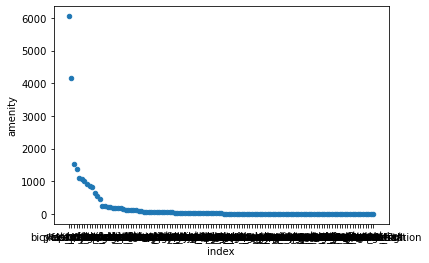

In [89]:
amenity_plot = pd.DataFrame(data_IN['amenity'].value_counts())\
    .reset_index()\
    .query
    .plot.scatter(x = 'index', y='amenity')

In [114]:
def plot_frequency_with_threshold(df_IN, col, thr = 0):
    df = pd.DataFrame(df_IN[col].value_counts()).reset_index()
    df = df[df[col] >= thr*df[col].sum()]
    df.plot.bar(x='index', y=col)
    return df

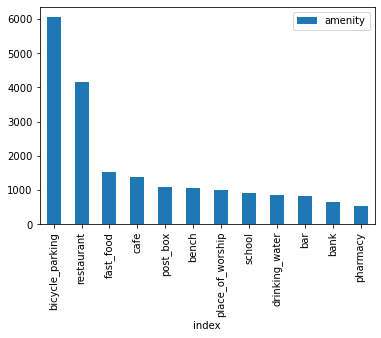

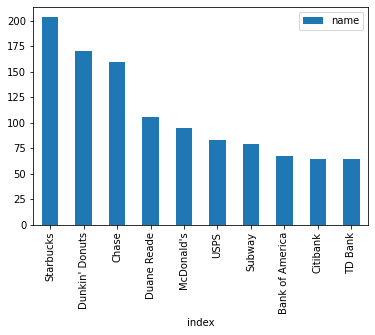

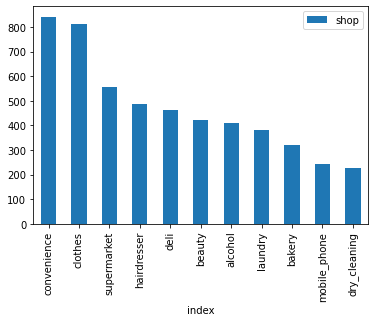

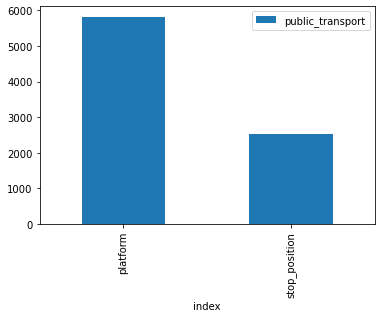

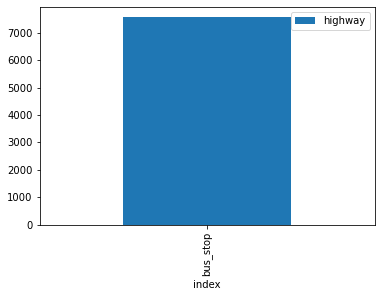

In [144]:
amenity_freq_fltrd = plot_frequency_with_threshold(data_IN, 'amenity', thr = 0.02)
name_freq_fltrd = plot_frequency_with_threshold(data_IN, 'name', thr=0.002)
shop_freq_fltrd = plot_frequency_with_threshold(data_IN, 'shop', thr=0.02)
public_transport_freq_fltrd = plot_frequency_with_threshold(data_IN, 'public_transport')
highway_freq_fltrd = plot_frequency_with_threshold(data_IN, 'highway')


In [102]:
a = pd.DataFrame(data_IN['amenity'].value_counts()).reset_index()
a

,index,amenity
0,bicycle_parking,6052
1,restaurant,4156
2,fast_food,1531
3,cafe,1374
4,post_box,1093
...,...,...
114,Statue,1
115,waste_transfer_station,1
116,graphic_design,1
117,supermarket,1
